In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
#from imblearn.under_sampling import TomekLinks

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
db = pd.read_csv('/content/drive/My Drive/aman_ds.csv')

In [6]:
db.head()

,Unnamed: 0,src_111,src_112,src_113,src_191,other_src_ip,dest_ip_191,dest_ip_8,dest_ip_194to162,other_dest_ip,other_src_port,srcport_443,other_dest_port,destport_443,Duration,flow_sent_55,flow_sent_less,flow_sent_more,FlowSentRate,flow_rec_66,flow_rec_less,flow_rec_more,FlowRecvRate,Length_variation,Length_std,Length_mode,Length_mean,Length_median,skew_median,skew_mode,Length_cov,Time_var,Time_std,Time_mean,Time_median,Time_mode,skew_med_time,skew_mode_time,cov_time,res_time_var,res_time_std,res_time_mean,res_time_med,res_time_mode,res_skew_med_time,res_skew_mode_time,res_cov_time,Label
0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,-0.353507,0,1,0,-0.038713,0,0,1,-0.068689,-0.025061,0.435001,3.450375,1.332750,1.387531,0.133807,-1.488662,-0.135197,-0.282027,-0.358672,-0.230290,-0.100947,0.456427,-1.069315,-1.421161,-0.828711,-0.113127,-0.126639,-0.050184,0.140587,-0.048074,0.179427,0.691027,0.091464,NonDoH
1,1,0,0,0,1,0,0,0,0,1,1,0,0,1,-0.453859,0,0,1,-0.040957,0,0,1,-0.136899,-0.333338,-0.748660,-0.163299,-0.657948,-0.180604,-1.958453,-1.134942,-0.858584,-0.284695,-0.452667,-0.409684,-0.313163,-0.129110,-1.504089,0.328504,-0.460385,-0.113477,-0.182796,0.166193,0.322024,0.506174,-1.444392,-1.489695,-0.527502,NonDoH
2,2,0,0,0,1,0,0,0,0,1,1,0,0,1,-0.457267,0,0,1,0.005872,0,1,0,0.125538,-0.110057,0.252553,-0.289805,0.392213,-0.238868,0.916266,0.305363,0.355579,-0.284731,-0.460700,-0.416774,-0.327168,-0.129110,-0.548409,0.867792,-0.803437,-0.113477,-0.182734,-0.133002,-0.055905,0.009551,0.838991,0.692224,-0.525180,NonDoH
3,3,0,0,0,1,0,0,0,0,1,1,0,0,1,-0.221662,0,0,1,-0.041245,0,1,0,-0.135184,-0.311957,-0.465871,-0.289805,-0.425361,-0.193921,0.360076,0.238742,0.107735,-0.278024,-0.296907,-0.341453,-0.321976,-0.077396,0.919694,-0.575457,1.265228,-0.113466,-0.172983,-0.144245,-0.056770,-0.048063,0.264739,0.727377,0.010519,NonDoH
4,4,0,0,0,1,0,0,0,0,1,1,0,0,1,-0.460122,1,0,0,0.003278,1,0,0,0.028082,-0.031536,0.422067,-0.289805,0.018507,-0.253850,0.308179,-0.002766,1.328569,-0.284735,-0.462552,-0.421523,-0.333318,-0.129110,0.176719,0.465554,-0.572067,-0.113475,-0.178812,-0.151466,-0.074899,-0.039690,0.349409,0.778978,-0.213125,NonDoH


In [7]:
total_cols=len(db.axes[1])

In [8]:
print("Number of Columns: "+str(total_cols))

Number of Columns: 48


In [5]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [9]:
db = db.iloc[:,1:48]

In [ ]:
db = db.iloc[:,0:45]

In [10]:
db

,src_111,src_112,src_113,src_191,other_src_ip,dest_ip_191,dest_ip_8,dest_ip_194to162,other_dest_ip,other_src_port,srcport_443,other_dest_port,destport_443,Duration,flow_sent_55,flow_sent_less,flow_sent_more,FlowSentRate,flow_rec_66,flow_rec_less,flow_rec_more,FlowRecvRate,Length_variation,Length_std,Length_mode,Length_mean,Length_median,skew_median,skew_mode,Length_cov,Time_var,Time_std,Time_mean,Time_median,Time_mode,skew_med_time,skew_mode_time,cov_time,res_time_var,res_time_std,res_time_mean,res_time_med,res_time_mode,res_skew_med_time,res_skew_mode_time,res_cov_time,Label
0,0,0,0,0,1,1,0,0,0,0,1,1,0,-0.353507,0,1,0,-0.038713,0,0,1,-0.068689,-0.025061,0.435001,3.450375,1.332750,1.387531,0.133807,-1.488662,-0.135197,-0.282027,-0.358672,-0.230290,-0.100947,0.456427,-1.069315,-1.421161,-0.828711,-0.113127,-0.126639,-0.050184,0.140587,-0.048074,0.179427,0.691027,0.091464,NonDoH
1,0,0,0,1,0,0,0,0,1,1,0,0,1,-0.453859,0,0,1,-0.040957,0,0,1,-0.136899,-0.333338,-0.748660,-0.163299,-0.657948,-0.180604,-1.958453,-1.134942,-0.858584,-0.284695,-0.452667,-0.409684,-0.313163,-0.129110,-1.504089,0.328504,-0.460385,-0.113477,-0.182796,0.166193,0.322024,0.506174,-1.444392,-1.489695,-0.527502,NonDoH
2,0,0,0,1,0,0,0,0,1,1,0,0,1,-0.457267,0,0,1,0.005872,0,1,0,0.125538,-0.110057,0.252553,-0.289805,0.392213,-0.238868,0.916266,0.305363,0.355579,-0.284731,-0.460700,-0.416774,-0.327168,-0.129110,-0.548409,0.867792,-0.803437,-0.113477,-0.182734,-0.133002,-0.055905,0.009551,0.838991,0.692224,-0.525180,NonDoH
3,0,0,0,1,0,0,0,0,1,1,0,0,1,-0.221662,0,0,1,-0.041245,0,1,0,-0.135184,-0.311957,-0.465871,-0.289805,-0.425361,-0.193921,0.360076,0.238742,0.107735,-0.278024,-0.296907,-0.341453,-0.321976,-0.077396,0.919694,-0.575457,1.265228,-0.113466,-0.172983,-0.144245,-0.056770,-0.048063,0.264739,0.727377,0.010519,NonDoH
4,0,0,0,1,0,0,0,0,1,1,0,0,1,-0.460122,1,0,0,0.003278,1,0,0,0.028082,-0.031536,0.422067,-0.289805,0.018507,-0.253850,0.308179,-0.002766,1.328569,-0.284735,-0.462552,-0.421523,-0.333318,-0.129110,0.176719,0.465554,-0.572067,-0.113475,-0.178812,-0.151466,-0.074899,-0.039690,0.349409,0.778978,-0.213125,NonDoH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874930,0,0,0,0,1,0,0,0,1,0,1,1,0,-0.462975,0,0,1,-0.022557,0,1,0,-0.095452,-0.333395,-0.751982,-0.256803,-0.641551,-0.170616,-1.818610,0.787546,-0.902620,-0.284738,-0.464928,-0.424257,-0.335032,-0.129110,-1.078375,0.864491,-0.801952,-0.113477,-0.182796,-0.127309,-0.048682,0.019214,-1.444392,-1.489695,-0.527502,Benign
874931,0,0,0,0,1,0,0,0,1,0,1,1,0,-0.135205,0,1,0,-0.042658,0,1,0,-0.136356,-0.141749,0.175758,-0.289805,0.105238,-0.293802,0.686254,0.164930,0.646538,-0.254542,-0.107023,-0.252563,-0.321170,-0.129110,0.991837,-0.463100,1.376692,-0.113477,-0.182134,-0.058444,0.037672,0.131998,0.965182,0.602609,-0.519652,Benign
874932,0,0,0,0,1,0,0,0,1,0,1,1,0,-0.463602,0,0,1,-0.030651,0,1,0,-0.118245,-0.333691,-0.780653,-0.287055,-0.729565,-0.312114,-0.487732,0.577172,-1.070416,-0.284738,-0.465440,-0.425963,-0.337303,-0.129110,-0.035222,-0.050548,0.022710,-0.113477,-0.182796,-0.147009,-0.073564,-0.013471,-1.444392,-1.489695,-0.527502,Benign
874933,0,0,0,0,1,0,0,0,1,0,1,1,0,1.074728,0,0,1,-0.043098,0,1,0,-0.138803,-0.333473,-0.757123,-0.256803,-0.675280,-0.293802,1.044199,0.312936,-0.903864,0.712600,1.598696,1.987907,3.349943,-0.129110,-1.604280,0.246485,-0.381469,-0.113476,-0.179883,-0.138381,-0.062666,-0.007154,0.677554,0.639497,-0.399502,Benign


In [ ]:
x1 = db.iloc[:,0:46]

In [ ]:
x1

,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,not_dest_freq,Wrong_port,port_is_443,Wrong_port.1,destination_port_443,Duration,fs_1807,fs_more,fsless,FlowSentRate,FlowRecvRate,Pcket_lenVar,Length_std,Length_mean,L_median,L_mode,s_median,s_mode,PLCV,PTV,PT_std,PT_mean,PT_median,Packt_Time_mode,s_mode_time,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time,Benign
0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,-0.440208,0,0,1,-0.047449,-0.068512,1.373156,1.345171,0.487511,-0.491741,-0.000535,0.121728,-0.010777,1.660695,-0.431219,-0.184718,-0.538284,-0.720731,-0.206235,-0.618505,0.754077,-0.178941,-0.244670,-0.239715,-0.221598,-0.159623,-0.652141,0.648299,-0.362176,Benign
1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1.171644,0,0,1,-0.046519,-0.066069,-0.803914,-0.857288,-0.990306,-0.231637,2.240525,0.169689,-0.002464,-0.425578,-0.159825,0.166489,0.286223,0.252663,-0.206235,0.667936,-0.814219,-0.132047,0.277059,-0.183655,-0.225091,-0.159603,0.638875,-0.336711,1.168953,Benign
2,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1.145800,0,0,1,-0.046384,-0.065895,-0.782394,-0.800554,-1.077896,0.241279,-0.000535,-0.230860,0.040893,-0.195131,-0.122865,0.208034,0.324102,0.333618,-0.206235,0.674878,-0.817715,-0.178940,-0.244316,-0.238336,-0.221617,-0.153063,0.260054,-0.500979,-0.415456,Benign
3,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,2.703618,0,0,1,-0.047728,-0.069886,-0.917591,-1.403104,-1.467504,0.193987,4.363633,-1.802284,-0.745979,-1.651453,5.790106,3.400471,1.737912,1.455512,-0.206235,-0.012624,-0.316040,-0.178946,-0.250146,-0.238243,-0.221523,-0.152942,1.330461,-0.025069,-0.629109,Benign
4,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1.152860,0,0,1,-0.046574,-0.061795,0.003366,0.306569,0.810232,-0.231637,-0.708237,0.499202,0.169892,0.119444,-0.058679,0.277596,0.328046,0.327773,-0.206235,0.584831,-0.770578,-0.178937,-0.242955,-0.240378,-0.221754,-0.159628,-0.683835,0.237335,-0.213566,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269638,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,-1.180485,0,0,1,0.042370,0.393385,1.858523,1.631520,1.129860,0.300394,-0.000535,0.119261,0.024568,1.347698,-0.806272,-1.305099,-0.916515,-0.720837,-0.206235,1.103071,-0.997728,-0.178940,-0.244337,-0.240169,-0.221636,-0.159490,-0.854542,0.436316,-0.311703,Malicious
269639,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,-0.434267,0,0,1,-0.047440,-0.068485,0.085689,0.385244,0.261385,-0.491741,-0.000535,0.309057,0.064837,0.621267,-0.448326,-0.210618,-0.572127,-0.720611,-0.206235,-0.679932,0.947832,-0.178940,-0.244243,-0.240186,-0.221621,-0.159624,-0.858302,0.445921,-0.305124,Malicious
269640,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1.466744,0,0,1,-0.043935,-0.066106,-0.854811,-1.017466,-1.053418,-0.231637,2.240525,0.271037,0.035748,-0.766433,1.480249,1.464438,1.441005,1.336621,-0.206235,0.758734,-0.858274,-0.178946,-0.250175,-0.243940,-0.226451,-0.159623,0.488731,-0.315781,0.021393,Malicious
269641,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,-0.446174,0,0,1,-0.047435,-0.068482,0.114244,0.411776,0.331262,-0.491741,-0.000535,0.324882,0.070598,0.596244,-0.452158,-0.216503,-0.567942,-0.720785,-0.206235,-0.665040,0.898332,-0.178940,-0.244267,-0.240184,-0.221634,-0.159625,-0.852680,0.450752,-0.306641,Malicious


In [11]:
x1 = db.iloc[:,0:46]

In [13]:
y1 = db.iloc[:,46]

In [12]:
x1

,src_111,src_112,src_113,src_191,other_src_ip,dest_ip_191,dest_ip_8,dest_ip_194to162,other_dest_ip,other_src_port,srcport_443,other_dest_port,destport_443,Duration,flow_sent_55,flow_sent_less,flow_sent_more,FlowSentRate,flow_rec_66,flow_rec_less,flow_rec_more,FlowRecvRate,Length_variation,Length_std,Length_mode,Length_mean,Length_median,skew_median,skew_mode,Length_cov,Time_var,Time_std,Time_mean,Time_median,Time_mode,skew_med_time,skew_mode_time,cov_time,res_time_var,res_time_std,res_time_mean,res_time_med,res_time_mode,res_skew_med_time,res_skew_mode_time,res_cov_time
0,0,0,0,0,1,1,0,0,0,0,1,1,0,-0.353507,0,1,0,-0.038713,0,0,1,-0.068689,-0.025061,0.435001,3.450375,1.332750,1.387531,0.133807,-1.488662,-0.135197,-0.282027,-0.358672,-0.230290,-0.100947,0.456427,-1.069315,-1.421161,-0.828711,-0.113127,-0.126639,-0.050184,0.140587,-0.048074,0.179427,0.691027,0.091464
1,0,0,0,1,0,0,0,0,1,1,0,0,1,-0.453859,0,0,1,-0.040957,0,0,1,-0.136899,-0.333338,-0.748660,-0.163299,-0.657948,-0.180604,-1.958453,-1.134942,-0.858584,-0.284695,-0.452667,-0.409684,-0.313163,-0.129110,-1.504089,0.328504,-0.460385,-0.113477,-0.182796,0.166193,0.322024,0.506174,-1.444392,-1.489695,-0.527502
2,0,0,0,1,0,0,0,0,1,1,0,0,1,-0.457267,0,0,1,0.005872,0,1,0,0.125538,-0.110057,0.252553,-0.289805,0.392213,-0.238868,0.916266,0.305363,0.355579,-0.284731,-0.460700,-0.416774,-0.327168,-0.129110,-0.548409,0.867792,-0.803437,-0.113477,-0.182734,-0.133002,-0.055905,0.009551,0.838991,0.692224,-0.525180
3,0,0,0,1,0,0,0,0,1,1,0,0,1,-0.221662,0,0,1,-0.041245,0,1,0,-0.135184,-0.311957,-0.465871,-0.289805,-0.425361,-0.193921,0.360076,0.238742,0.107735,-0.278024,-0.296907,-0.341453,-0.321976,-0.077396,0.919694,-0.575457,1.265228,-0.113466,-0.172983,-0.144245,-0.056770,-0.048063,0.264739,0.727377,0.010519
4,0,0,0,1,0,0,0,0,1,1,0,0,1,-0.460122,1,0,0,0.003278,1,0,0,0.028082,-0.031536,0.422067,-0.289805,0.018507,-0.253850,0.308179,-0.002766,1.328569,-0.284735,-0.462552,-0.421523,-0.333318,-0.129110,0.176719,0.465554,-0.572067,-0.113475,-0.178812,-0.151466,-0.074899,-0.039690,0.349409,0.778978,-0.213125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874930,0,0,0,0,1,0,0,0,1,0,1,1,0,-0.462975,0,0,1,-0.022557,0,1,0,-0.095452,-0.333395,-0.751982,-0.256803,-0.641551,-0.170616,-1.818610,0.787546,-0.902620,-0.284738,-0.464928,-0.424257,-0.335032,-0.129110,-1.078375,0.864491,-0.801952,-0.113477,-0.182796,-0.127309,-0.048682,0.019214,-1.444392,-1.489695,-0.527502
874931,0,0,0,0,1,0,0,0,1,0,1,1,0,-0.135205,0,1,0,-0.042658,0,1,0,-0.136356,-0.141749,0.175758,-0.289805,0.105238,-0.293802,0.686254,0.164930,0.646538,-0.254542,-0.107023,-0.252563,-0.321170,-0.129110,0.991837,-0.463100,1.376692,-0.113477,-0.182134,-0.058444,0.037672,0.131998,0.965182,0.602609,-0.519652
874932,0,0,0,0,1,0,0,0,1,0,1,1,0,-0.463602,0,0,1,-0.030651,0,1,0,-0.118245,-0.333691,-0.780653,-0.287055,-0.729565,-0.312114,-0.487732,0.577172,-1.070416,-0.284738,-0.465440,-0.425963,-0.337303,-0.129110,-0.035222,-0.050548,0.022710,-0.113477,-0.182796,-0.147009,-0.073564,-0.013471,-1.444392,-1.489695,-0.527502
874933,0,0,0,0,1,0,0,0,1,0,1,1,0,1.074728,0,0,1,-0.043098,0,1,0,-0.138803,-0.333473,-0.757123,-0.256803,-0.675280,-0.293802,1.044199,0.312936,-0.903864,0.712600,1.598696,1.987907,3.349943,-0.129110,-1.604280,0.246485,-0.381469,-0.113476,-0.179883,-0.138381,-0.062666,-0.007154,0.677554,0.639497,-0.399502


In [15]:
np.isnan(x1).any()

src_111               False
src_112               False
src_113               False
src_191               False
other_src_ip          False
dest_ip_191           False
dest_ip_8             False
dest_ip_194to162      False
other_dest_ip         False
other_src_port        False
srcport_443           False
other_dest_port       False
destport_443          False
Duration              False
flow_sent_55          False
flow_sent_less        False
flow_sent_more        False
FlowSentRate          False
flow_rec_66           False
flow_rec_less         False
flow_rec_more         False
FlowRecvRate          False
Length_variation      False
Length_std            False
Length_mode           False
Length_mean           False
Length_median         False
skew_median           False
skew_mode             False
Length_cov            False
Time_var              False
Time_std              False
Time_mean             False
Time_median           False
Time_mode             False
skew_med_time       

In [14]:
y1.head()

0    NonDoH
1    NonDoH
2    NonDoH
3    NonDoH
4    NonDoH
Name: Label, dtype: object

In [16]:
x1 = x1.drop(['res_time_med'], axis = 1)

In [18]:
np.isnan(x1).any()

src_111               False
src_112               False
src_113               False
src_191               False
other_src_ip          False
dest_ip_191           False
dest_ip_8             False
dest_ip_194to162      False
other_dest_ip         False
other_src_port        False
srcport_443           False
other_dest_port       False
destport_443          False
Duration              False
flow_sent_55          False
flow_sent_less        False
flow_sent_more        False
FlowSentRate          False
flow_rec_66           False
flow_rec_less         False
flow_rec_more         False
FlowRecvRate          False
Length_variation      False
Length_std            False
Length_mode           False
Length_mean           False
Length_median         False
skew_median           False
skew_mode             False
Length_cov            False
Time_var              False
Time_std              False
Time_mean             False
Time_median           False
Time_mode             False
skew_med_time       

In [19]:
x1 = x1.drop(['res_skew_med_time'], axis = 1)

In [21]:
x1

,src_111,src_112,src_113,src_191,other_src_ip,dest_ip_191,dest_ip_8,dest_ip_194to162,other_dest_ip,other_src_port,srcport_443,other_dest_port,destport_443,Duration,flow_sent_55,flow_sent_less,flow_sent_more,FlowSentRate,flow_rec_66,flow_rec_less,flow_rec_more,FlowRecvRate,Length_variation,Length_std,Length_mode,Length_mean,Length_median,skew_median,skew_mode,Length_cov,Time_var,Time_std,Time_mean,Time_median,Time_mode,skew_med_time,skew_mode_time,cov_time,res_time_var,res_time_std,res_time_mean,res_time_mode,res_skew_mode_time,res_cov_time
0,0,0,0,0,1,1,0,0,0,0,1,1,0,-0.353507,0,1,0,-0.038713,0,0,1,-0.068689,-0.025061,0.435001,3.450375,1.332750,1.387531,0.133807,-1.488662,-0.135197,-0.282027,-0.358672,-0.230290,-0.100947,0.456427,-1.069315,-1.421161,-0.828711,-0.113127,-0.126639,-0.050184,-0.048074,0.691027,0.091464
1,0,0,0,1,0,0,0,0,1,1,0,0,1,-0.453859,0,0,1,-0.040957,0,0,1,-0.136899,-0.333338,-0.748660,-0.163299,-0.657948,-0.180604,-1.958453,-1.134942,-0.858584,-0.284695,-0.452667,-0.409684,-0.313163,-0.129110,-1.504089,0.328504,-0.460385,-0.113477,-0.182796,0.166193,0.506174,-1.489695,-0.527502
2,0,0,0,1,0,0,0,0,1,1,0,0,1,-0.457267,0,0,1,0.005872,0,1,0,0.125538,-0.110057,0.252553,-0.289805,0.392213,-0.238868,0.916266,0.305363,0.355579,-0.284731,-0.460700,-0.416774,-0.327168,-0.129110,-0.548409,0.867792,-0.803437,-0.113477,-0.182734,-0.133002,0.009551,0.692224,-0.525180
3,0,0,0,1,0,0,0,0,1,1,0,0,1,-0.221662,0,0,1,-0.041245,0,1,0,-0.135184,-0.311957,-0.465871,-0.289805,-0.425361,-0.193921,0.360076,0.238742,0.107735,-0.278024,-0.296907,-0.341453,-0.321976,-0.077396,0.919694,-0.575457,1.265228,-0.113466,-0.172983,-0.144245,-0.048063,0.727377,0.010519
4,0,0,0,1,0,0,0,0,1,1,0,0,1,-0.460122,1,0,0,0.003278,1,0,0,0.028082,-0.031536,0.422067,-0.289805,0.018507,-0.253850,0.308179,-0.002766,1.328569,-0.284735,-0.462552,-0.421523,-0.333318,-0.129110,0.176719,0.465554,-0.572067,-0.113475,-0.178812,-0.151466,-0.039690,0.778978,-0.213125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874930,0,0,0,0,1,0,0,0,1,0,1,1,0,-0.462975,0,0,1,-0.022557,0,1,0,-0.095452,-0.333395,-0.751982,-0.256803,-0.641551,-0.170616,-1.818610,0.787546,-0.902620,-0.284738,-0.464928,-0.424257,-0.335032,-0.129110,-1.078375,0.864491,-0.801952,-0.113477,-0.182796,-0.127309,0.019214,-1.489695,-0.527502
874931,0,0,0,0,1,0,0,0,1,0,1,1,0,-0.135205,0,1,0,-0.042658,0,1,0,-0.136356,-0.141749,0.175758,-0.289805,0.105238,-0.293802,0.686254,0.164930,0.646538,-0.254542,-0.107023,-0.252563,-0.321170,-0.129110,0.991837,-0.463100,1.376692,-0.113477,-0.182134,-0.058444,0.131998,0.602609,-0.519652
874932,0,0,0,0,1,0,0,0,1,0,1,1,0,-0.463602,0,0,1,-0.030651,0,1,0,-0.118245,-0.333691,-0.780653,-0.287055,-0.729565,-0.312114,-0.487732,0.577172,-1.070416,-0.284738,-0.465440,-0.425963,-0.337303,-0.129110,-0.035222,-0.050548,0.022710,-0.113477,-0.182796,-0.147009,-0.013471,-1.489695,-0.527502
874933,0,0,0,0,1,0,0,0,1,0,1,1,0,1.074728,0,0,1,-0.043098,0,1,0,-0.138803,-0.333473,-0.757123,-0.256803,-0.675280,-0.293802,1.044199,0.312936,-0.903864,0.712600,1.598696,1.987907,3.349943,-0.129110,-1.604280,0.246485,-0.381469,-0.113476,-0.179883,-0.138381,-0.007154,0.639497,-0.399502


In [22]:
np.isnan(x1).any()

src_111               False
src_112               False
src_113               False
src_191               False
other_src_ip          False
dest_ip_191           False
dest_ip_8             False
dest_ip_194to162      False
other_dest_ip         False
other_src_port        False
srcport_443           False
other_dest_port       False
destport_443          False
Duration              False
flow_sent_55          False
flow_sent_less        False
flow_sent_more        False
FlowSentRate          False
flow_rec_66           False
flow_rec_less         False
flow_rec_more         False
FlowRecvRate          False
Length_variation      False
Length_std            False
Length_mode           False
Length_mean           False
Length_median         False
skew_median           False
skew_mode             False
Length_cov            False
Time_var              False
Time_std              False
Time_mean             False
Time_median           False
Time_mode             False
skew_med_time       

In [23]:
from collections import Counter

print(Counter(y1))

Counter({'NonDoH': 855128, 'Benign': 19807})


In [ ]:
c_class_0, c_class_1 = db.Label.value_counts()

In [24]:
c_class_0, c_class_1 = db.Label.value_counts()

In [25]:
print(c_class_0)
print(c_class_1)

855128
19807


In [26]:
df_c_0 = db[db['Label'] == 'NonDoH']
df_c_1 = db[db['Label'] == 'Benign']

In [27]:
df_c_0_under = df_c_0.sample(c_class_1)

In [28]:
df_under = pd.concat([df_c_0_under, df_c_1], axis=0)

In [30]:
print(df_under.Label.value_counts())

Benign    19807
NonDoH    19807
Name: Label, dtype: int64


In [31]:
df_Totoal = df_under

In [32]:
df_Totoal.head()

,src_111,src_112,src_113,src_191,other_src_ip,dest_ip_191,dest_ip_8,dest_ip_194to162,other_dest_ip,other_src_port,srcport_443,other_dest_port,destport_443,Duration,flow_sent_55,flow_sent_less,flow_sent_more,FlowSentRate,flow_rec_66,flow_rec_less,flow_rec_more,FlowRecvRate,Length_variation,Length_std,Length_mode,Length_mean,Length_median,skew_median,skew_mode,Length_cov,Time_var,Time_std,Time_mean,Time_median,Time_mode,skew_med_time,skew_mode_time,cov_time,res_time_var,res_time_std,res_time_mean,res_time_med,res_time_mode,res_skew_med_time,res_skew_mode_time,res_cov_time,Label
392646,0,0,0,1,0,0,0,0,1,1,0,0,1,-0.463604,1,0,0,-0.030612,1,0,0,-0.118180,-0.333691,-0.780653,-0.287055,-0.729565,-0.312114,-0.487732,0.577172,-1.070416,-0.284738,-0.465443,-0.425965,-0.337306,-0.129110,-0.035222,-0.050548,0.022710,-0.113477,-0.182796,-0.147075,-0.073647,-0.013580,-1.444392,-1.489695,-0.527502,NonDoH
750280,0,0,0,1,0,0,0,0,1,1,0,0,1,-0.459454,1,0,0,0.000509,1,0,0,0.009791,-0.210022,-0.015075,-0.289805,-0.139761,-0.267167,0.494661,0.099015,0.753653,-0.284735,-0.462256,-0.421212,-0.334083,-0.129110,0.793081,0.441034,-0.553684,-0.113474,-0.177716,-0.151108,-0.073804,-0.048108,0.381651,0.832190,-0.135199,NonDoH
25243,0,0,0,1,0,0,0,0,1,1,0,0,1,-0.451939,0,0,1,-0.023425,0,0,1,-0.026678,0.080994,0.630190,-0.256803,0.283298,-0.267167,0.461631,0.043177,1.105416,-0.284716,-0.456486,-0.409955,-0.325740,-0.129110,0.947852,0.801244,-0.772431,-0.113429,-0.161915,-0.123196,-0.023776,-0.048124,0.390076,0.696299,0.078447,NonDoH
683462,0,0,1,0,0,0,0,0,1,1,0,0,1,-0.445306,0,1,0,-0.029699,0,0,1,-0.091721,-0.154914,0.142000,-0.289805,0.225405,-0.072399,0.614418,0.272406,0.395078,-0.284688,-0.451719,-0.403459,-0.319905,-0.085074,0.707515,-0.613452,-0.712691,-0.113477,-0.182096,-0.048495,0.049945,0.148275,1.077720,0.617452,-0.519898,NonDoH
141658,1,0,0,0,0,0,0,0,1,1,0,0,1,-0.463604,0,0,1,-0.018535,0,1,0,-0.120060,-0.333709,-0.785933,-0.289805,-0.742900,-0.333755,0.982988,0.283420,-1.122219,-0.284738,-0.465495,-0.425699,-0.336530,-0.129110,-1.502225,0.328503,-0.460385,-0.113477,-0.182796,-0.147093,-0.073670,-0.013610,-1.444392,-1.489695,-0.527502,NonDoH


In [33]:
x = df_Totoal.iloc[:,0:46]
y = df_Totoal.iloc[:,46]

In [34]:
np.isnan(x).any()

src_111               False
src_112               False
src_113               False
src_191               False
other_src_ip          False
dest_ip_191           False
dest_ip_8             False
dest_ip_194to162      False
other_dest_ip         False
other_src_port        False
srcport_443           False
other_dest_port       False
destport_443          False
Duration              False
flow_sent_55          False
flow_sent_less        False
flow_sent_more        False
FlowSentRate          False
flow_rec_66           False
flow_rec_less         False
flow_rec_more         False
FlowRecvRate          False
Length_variation      False
Length_std            False
Length_mode           False
Length_mean           False
Length_median         False
skew_median           False
skew_mode             False
Length_cov            False
Time_var              False
Time_std              False
Time_mean             False
Time_median           False
Time_mode             False
skew_med_time       

In [37]:
x = x.drop(['res_time_med'], axis = 1)

KeyError: ignored

In [38]:
x = x.drop(['res_skew_med_time'], axis = 1)

In [39]:
np.isnan(x).any()

src_111               False
src_112               False
src_113               False
src_191               False
other_src_ip          False
dest_ip_191           False
dest_ip_8             False
dest_ip_194to162      False
other_dest_ip         False
other_src_port        False
srcport_443           False
other_dest_port       False
destport_443          False
Duration              False
flow_sent_55          False
flow_sent_less        False
flow_sent_more        False
FlowSentRate          False
flow_rec_66           False
flow_rec_less         False
flow_rec_more         False
FlowRecvRate          False
Length_variation      False
Length_std            False
Length_mode           False
Length_mean           False
Length_median         False
skew_median           False
skew_mode             False
Length_cov            False
Time_var              False
Time_std              False
Time_mean             False
Time_median           False
Time_mode             False
skew_med_time       

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [41]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [42]:
x_train.shape

(31691, 44)

In [43]:
cvscores = []
i=0
for train, test in kfold.split(x_train, y_train):
    cnn = Sequential()
    cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(44,1)))
    cnn.add(MaxPooling1D(pool_size=(2)))
    cnn.add(Flatten())
    cnn.add(Dense(128, activation="relu"))
    cnn.add(Dropout(0.5))
    cnn.add(Dense(2, activation="sigmoid"))
    # define optimizer and objective, compile cnn


    cnn.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])
    
    
    x_tn = x_train.iloc[train]
    y_tn = y_train.iloc[train]
    y_tn = pd.get_dummies(y_tn)
    x_ts = x_train.iloc[test]
    y_ts = y_train.iloc[test]
    y_ts = pd.get_dummies(y_ts)
    
    x_tn1 = x_tn.to_numpy()
    x_tn1 = np.reshape(x_tn1, (x_tn1.shape[0],x_tn1.shape[1],1))
    
    
    x_ts1 = x_ts.to_numpy()
    x_ts1 = np.reshape(x_ts1, (x_ts1.shape[0],x_ts1.shape[1],1))
    
    cnn.fit(x_tn1, y_tn, epochs=50,batch_size=64,verbose=1)
    scores = cnn.evaluate(x_ts1, y_ts, verbose=1)
    print(str(i)+"th Fold :")
    print("%s: %.2f%%" % (cnn.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    i = i+1
    print("------------------------------------------------------------------")


print("Average validation accuracy : ")   
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/50
446/446 [==============================] - 3s 7ms/step - loss: 0.4177 - accuracy: 0.7982
Epoch 2/50
446/446 [==============================] - 3s 7ms/step - loss: 0.3634 - accuracy: 0.8311
Epoch 3/50
446/446 [==============================] - 3s 7ms/step - loss: 0.3548 - accuracy: 0.8357
Epoch 4/50
446/446 [==============================] - 3s 7ms/step - loss: 0.3533 - accuracy: 0.8359
Epoch 5/50
446/446 [==============================] - 3s 7ms/step - loss: 0.3468 - accuracy: 0.8373
Epoch 6/50
446/446 [==============================] - 3s 7ms/step - loss: 0.3462 - accuracy: 0.8374
Epoch 7/50
446/446 [==============================] - 3s 7ms/step - loss: 0.3457 - accuracy: 0.8375
Epoch 8/50
446/446 [==============================] - 3s 7ms/step - loss: 0.3450 - accuracy: 0.8375
Epoch 9/50
446/446 [==============================] - 3s 7ms/step - loss: 0.3418 - accuracy: 0.8375
Epoch 10/50
446/446 [==============================] - 3s 7ms/step - loss: 0.3432 - accuracy: 0.8376

In [44]:
x_tr = x_train.to_numpy()
x_tr = np.reshape(x_tr, (x_tr.shape[0], x_tr.shape[1],1))

In [45]:
x_ts = x_test.to_numpy()
x_ts = np.reshape(x_ts, (x_ts.shape[0], x_ts.shape[1],1))

In [46]:
y_tr = pd.get_dummies(y_train)
y_ts = pd.get_dummies(y_test)

In [47]:
_, train_acc = cnn.evaluate(x_tr, y_tr, verbose=1)
_, test_acc = cnn.evaluate(x_ts, y_ts, verbose=1)

248/248 [==============================] - 0s 1ms/step - loss: 0.3315 - accuracy: 0.8400


In [48]:
print("Training accuracy: "+str(train_acc*100))
print("Test accuracy: "+str(test_acc*100))

Training accuracy: 84.1185212135315
Test accuracy: 83.99596214294434


In [49]:
y_probs = cnn.predict(x_ts, verbose=1).ravel()
y_classes = cnn.predict_classes(x_ts, verbose=1)

248/248 [==============================] - 0s 1ms/step
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
248/248 [==============================] - 0s 1ms/step


In [50]:
y_pred = pd.get_dummies(y_classes)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_ts,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      3926
           1       0.79      0.94      0.86      3997

   micro avg       0.84      0.84      0.84      7923
   macro avg       0.85      0.84      0.84      7923
weighted avg       0.85      0.84      0.84      7923
 samples avg       0.84      0.84      0.84      7923



In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le = LabelEncoder()

In [54]:
y_test_le = le.fit_transform(y_test)

In [55]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_le, y_classes)

In [56]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [57]:
from matplotlib import pyplot

In [58]:
print(auc_keras)

0.8390599495724697


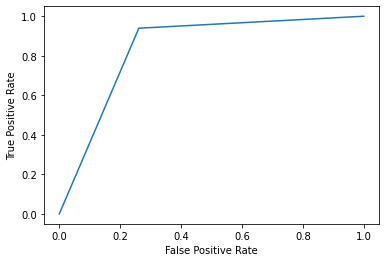

In [59]:
pyplot.plot(fpr_keras, tpr_keras)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()